In [26]:
import numpy as np 
from numpy import arange,array,ones,linalg
%matplotlib notebook 
%matplotlib inline 
import matplotlib.pyplot as plt

### Lineweaver–Burk plot
Starting from the (reciprocal of the) Michaelis-Menten equation:

$$
\frac{1}{V}=\frac{K_m}{V_{\text{max}}}\cdot\frac{1}{[S]}+\frac{1}{V_{\text{max}}}
$$

with $V$, $K_m$, $V_{\text{max}}$ and $[S]$ being the reaction rate ([M/s]), the Michaelis constant ([M]), the maximum reaction rate ([M/s]) and the substrate concentration ([M]), one can plot $\frac{1}{V} \left (\frac{1}{[S]} \right)$. Via linear regression one can thus find out $V_{\text{max}}$ (as the inverse of the $y$ intercept) and subsequently $K_m$ (as the slope is equal to $\frac{k_n}{V_{\text{max}}}$).

In [3]:
data=np.loadtxt("./data.dat")
# Column 1 = 1/V [\mu M^{-1} x 10 min]
# Column 2 = 1/[S] [mM^{-1}]
print(data)

[[1.       8.695652]
 [1.       8.064516]
 [0.625    6.802721]
 [0.390625 5.235602]
 [0.195313 3.921569]
 [0.145349 3.649635]
 [0.066667 3.401361]
 [0.05     3.333333]]


### 1/V (1/S)

In [32]:
A = array([ data[:,0], ones(len(data))])
l_reg=linalg.lstsq(A.T,data[:,1],rcond=None)[0] # obtaining the parameters
print(l_reg)
fit=l_reg[0]*data[:,0]+l_reg[1]

[5.47709037 3.01033826]


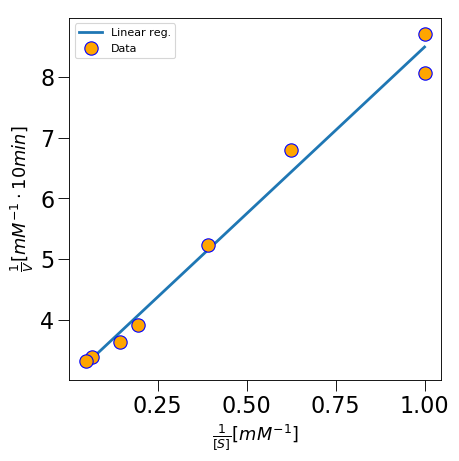

In [31]:
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)
plt.plot(data[:,0], fit, linewidth=2.5, label="Linear reg.")
plt.plot(data[:,0], data[:,1], 'o', markerfacecolor='orange', markersize=12, markeredgecolor='blue', 
         linewidth=2.5, label="Data")
plt.xlabel('$\\frac{1}{[S]} [mM^{-1}]$', fontsize=16)
plt.ylabel('$\\frac{1}{V} [mM^{-1}\\cdot 10min]$', fontsize=16)
plt.legend()
plt.show()

In [42]:
v_max=1/l_reg[1]
print(v_max,"[\mu M x 10 min]") # 0.033 \mu M x min

0.33218858242015903 [\mu M x 10 min]


In [43]:
k_m=l_reg[0]*v_max
print(k_m, "[mM]") # 0.00182 \mu M^{-1}

1.819426885008294 [mM]


### V (S)
From http://www1.lsbu.ac.uk/water/enztech/determination.html#1_102

In [49]:
d_data=np.zeros((len(data),2))
d_data[:,0]=1/data[:,0]
d_data[:,1]=1/data[:,1]

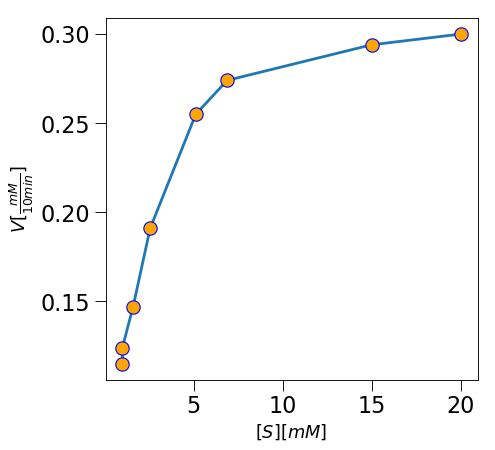

In [68]:
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)
plt.plot(d_data[:,0], d_data[:,1], linewidth=2.5)
plt.plot(d_data[:,0], d_data[:,1], 'o', markerfacecolor='orange', markersize=12, markeredgecolor='blue', 
         linewidth=2.5)
plt.xlabel('$[S] [mM]$', fontsize=16)
plt.ylabel('$V[\\frac{mM}{10 min}]$', fontsize=16)
#plt.legend()
plt.show()

In [180]:
# n lines from n(x,y) datapoints
# -[S]
nd=len(data)
dir_l=np.zeros((nd,4))
lines_par=np.zeros((nd,2))
x_lines=np.arange(-20,20)
nx=len(x_lines)
lin=np.zeros((nd,nx))
for i in range(0,nd):
    # dir_l. i= line n. i. point n. 1, x,y point n. 2, x,y 
    dir_l[i,0]=(d_data[i,0])*(-1) # -S 
    dir_l[i,1]=0 # 0
    dir_l[i,2]=0 # 0
    dir_l[i,3]=d_data[i,1]
    lines_par[i,0]=dir_l[i,3]/(-dir_l[i,0]) # slope
    lines_par[i,1]=lines_par[i,0]*(-dir_l[i,0]) # intercept
    lin[i,:]=lines_par[i,0]*x_lines+lines_par[i,1]
#     if i == 0:
#         print(d_data[i,0],d_data[i,1])
#         print(lines_par[i,:])

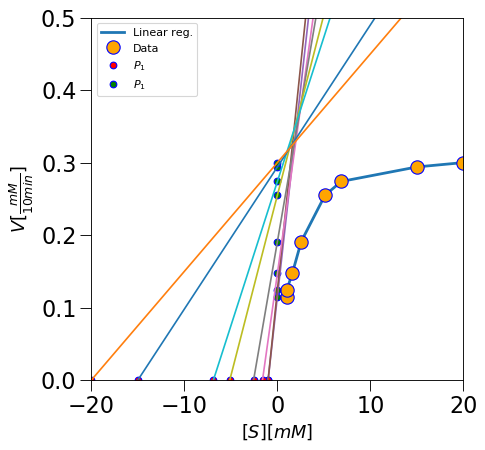

In [213]:
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)
plt.plot(d_data[:,0], d_data[:,1], linewidth=2.5, label="Linear reg.")
plt.plot(d_data[:,0], d_data[:,1], 'o', markerfacecolor='orange', markersize=12, markeredgecolor='blue', 
         linewidth=2.5, label="Data")
plt.plot(dir_l[:,0], dir_l[:,1], 'o', markerfacecolor='red', markersize=6, markeredgecolor='blue', 
         linewidth=2.5, label="$P_1$")
plt.plot(dir_l[:,2], dir_l[:,3], 'o', markerfacecolor='green', markersize=6, markeredgecolor='blue', 
         linewidth=2.5, label="$P_1$")
for i in range(0,nd):
    plt.plot(x_lines, lin[i], linewidth=1.5)
    
plt.xlabel('$[S] [mM]$', fontsize=16)
plt.ylabel('$V[\\frac{mM}{10 min}]$', fontsize=16)
plt.legend()
axes=plt.gca()
axes.set_xlim([-20,20])
axes.set_ylim([0.0,0.5])
plt.show()

In [210]:
# nd(nd-1)/2 intersections between the possible combinations of the n lines
n_pairs=int((nd*(nd-1))/2)
k_m_est=np.zeros(n_pairs)
v_max_est=np.zeros(n_pairs)
l=0
# line 1 -> y=a*x+c
# line 2 -> y=b*x+d

for i in range(0,nd):
    for j in range(i,nd):
        if i != j:
            #print(i,j,l)
            a=lines_par[i,0]
            c=lines_par[i,1]
            b=lines_par[j,0]
            d=lines_par[j,1]
            k_m_est[l]=(d-c)/(a-b)
            v_max_est[l]=(a*d-b*c)/(a-b)
            l=l+1

clean=k_m_est[k_m_est>0] # if < = 0, then the lines do not intersect
k_m_M=np.median(clean)
print(k_m_M)

clean=v_max_est[v_max_est>0]
v_max_M=np.median(clean)
print(v_max_M)

1.8500002622000298
0.3306993856528944
